# Sphere function optimization (min).

The general equation is given by:

$f(\mathbf{x}) = \sum_{i=1}^{M} x^2_i$,  with  $-\infty \le x_i \le +\infty$,
and global minimum found at: $f(x_1, x_2, ..., x_M) = f(0, 0, ..., 0) = 0$.

### First we import python libraries and set up the directory of our code.

In [3]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [5]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.standard_ga import StandardGA

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.uniform_crossover import UniformCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.random_mutator import RandomMutator

### Define the sphere function, which plays also the role of the 'fitness' function.

In addition, we define the '_func' which takes the role of the 'random()' method of the Genes. Every time we
want to 'mutate' a gene this function will be called that returns 'valid', but random values for the gene.

In [7]:
# Sphere function.
def fun_Sphere(individual: Chromosome, f_min: bool = True):
    
    # Compute the shpere function.
    f_val = fsum([xi.datum**2 for xi in individual])
    
    # Return the negative (to account for minimization).
    return -f_val if f_min else f_val
# _end_def_

# Random function ~N(0,1).
# Since 'xi' are allowed to take any real value in [-inf, +inf], by setting this
# to the Normal(0, 1) essentially we can get both negative and positive values.
_func = lambda: np.random.normal()

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by '_func'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [9]:
# Define the number of genes.
# In this problem the number of genes can be any positive integer [1, M]
M = 10

# Define the number of chromosomes.
N = 100

# Initial population.
# It is important to note that the initial population is randomly generated with valid values.
population = [Chromosome([Gene(np.random.uniform(-10.0, +10.0), _func) for j in range(M)], np.nan, True)
              for i in range(N)]

# Create the StandardGA object that will carry on the optimization.
# Note: in this example we have accepted, silently, the default probabilities in the
# genetic operators. These can be altered here before passed to the StandardGA constructor.
toy_GA = StandardGA(initial_pop=population,
                    fit_func=fun_Sphere,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(),
                    cross_op=UniformCrossover())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter, such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [11]:
toy_GA(epochs=2000, f_tol=1.0e-5, elitism=True, verbose=False)

Initial Avg. Fitness = -329.1394
Final   Avg. Fitness = -0.2522
Elapsed time: 33.616 seconds.


In [12]:
# Extract the optimal solution from the GA.
optimal_solution = toy_GA.best_chromosome()

# Display the (final) optimal value.
print(f"Minimum Found: {fun_Sphere(optimal_solution, f_min=False):.5f}\n")

# Display each gene value separately.
for i, xi in enumerate(optimal_solution.genome):
    print(f"x{i} = {xi.datum:>10.6f}")
# _end_for_

# True minimum: f(0.0, 0.0, ..., 0.0) = 0.0

Minimum Found: 0.00001

x0 =   0.000030
x1 =  -0.000464
x2 =   0.000532
x3 =  -0.000900
x4 =   0.000557
x5 =   0.000801
x6 =  -0.000610
x7 =  -0.002159
x8 =  -0.000277
x9 =  -0.000652


**Note that the above solution is indeed very close to the absolute minimum!**

In [14]:
# If we want we can also print some operator statistics.
toy_GA.print_operator_stats()

 LinearRankSelector: (140729162721344)
 _probability: 1.0
 _counter: 2000
 _lock: <unlocked _thread.lock object at 0x7ffe0fc35500>

 UniformCrossover: (140729159608944)
 _probability: 0.9
 _counter: 90025
 _lock: <unlocked _thread.lock object at 0x7ffe0f9db880>

 RandomMutator: (140729157511392)
 _probability: 0.1
 _counter: 19999
 _lock: <unlocked _thread.lock object at 0x7ffe0fc357c0>



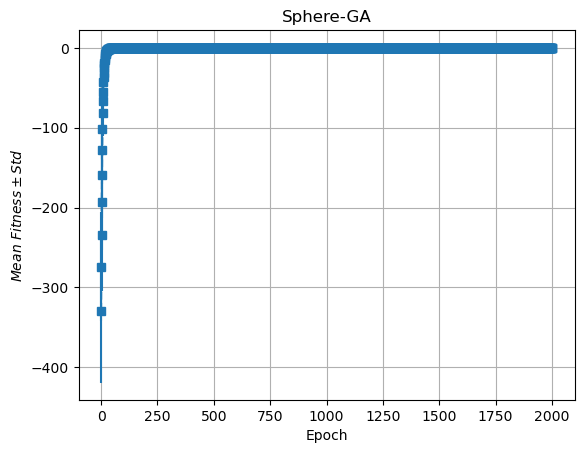

In [15]:
# Plot the average (population) fitness along with its spread (std)
# as function of the epochs.
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'], fmt='--s')

# Set up the lables.
plt.grid(True)
plt.title("Sphere-GA")
plt.xlabel("Epoch")
plt.ylabel("$Mean~Fitness \pm Std$");

### End of file